In [1]:
interactive = False  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import numpy as np


class MajoritySimulator:

    def __init__(self, size=100, initial_density=0.51, radius=1, interactive=True):
        '''
        Initialize new MajoritySimulator object with default parameter settings.

        Inputs:

            size (int) The number of cells along each dimension of the
              2-dimensional grid. Default: 100.

            initial_density (float) The proportion of cells that will be
              active (1) when the cellular automaton is initialized. The
              active cells will be at random locations. Default: 0.1.

            radius (int) The radius of the neighborhoods in the CA.
              Must be a positive integer. Default: 1.

            interactive (bool) Whether or not we are running an interactive
              simulation. In CoCalc we have to run in non-interactive mode
              (False), but in your local Python environment you should be
              able to run in interactive mode (True). Default: True.
        '''
        self.interactive = interactive
        self.size = size
        self.radius = radius
        self.initial_density = initial_density

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros((size, size))

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''

        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        random_indexes = np.random.choice(
            range(self.size ** 2),
            size=int(round(self.initial_density * self.size ** 2)),
            replace=False)

        # Fill the entire state array with zeros.
        self.current_state.fill(0)

        # Note: the flat attribute, used below, allows you to treat a multi-
        # dimensional array like a 1-dimensional array with the same number
        # of cells.
        self.current_state.flat[random_indexes] = 1

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        if self.interactive:
            plt.cla()  # Clear the current figure
        else:
            plt.figure()  # Create a new figure
        plt.imshow(self.current_state, vmin = 0, vmax = 1, cmap = plt.cm.binary)
        if not self.interactive:
            plt.show()

    def update(self):
        '''
        Update the state of the cellular automaton.
        '''
        total = np.zeros(self.current_state.shape)
        for dx in range(-self.radius, self.radius+1):
            shifted_state = np.roll(self.current_state, shift=dx, axis=1)
            for dy in range(-self.radius, self.radius+1):
                total += np.roll(shifted_state, shift=dy, axis=0)
        cells_in_neighborhood = (2 * self.radius + 1) ** 2
        majority_threshold = cells_in_neighborhood // 2 + 1
        self.current_state = total // majority_threshold

    def set_initial_density(self, value=None):
        '''
        The initial density of active cells. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.initial_density = min(1, max(0, float(value)))
        return self.initial_density

    def set_radius(self, value=None):
        '''
        The radius of the cellular automaton. Must be a positive integer.
        '''
        if value is not None:
            self.radius = int(value)
        return self.radius

Initial state:


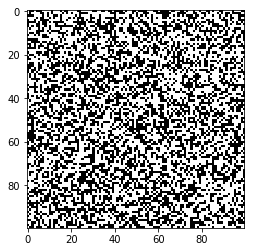

After steps 1-5:


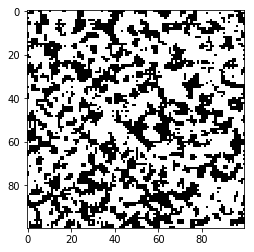

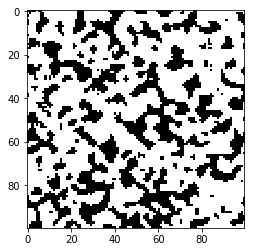

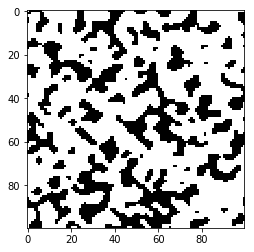

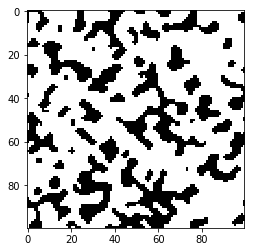

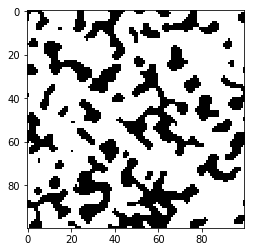

After steps 100-500


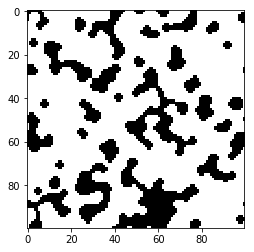

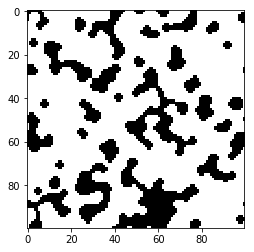

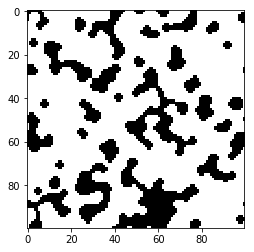

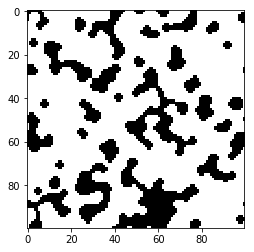

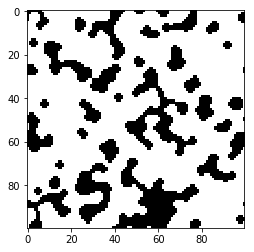

In [2]:
# Set up the simulation
sim = MajoritySimulator(initial_density=0.45, radius=1, interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_initial_density, sim.set_radius])
    gui.start(func=[sim.initialize, sim.draw, sim.update])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.draw()

    print('After steps 1-5:')
    for i in range(1, 6):
        sim.update()
        sim.draw()

    print('After steps 100-500')
    for i in range(6, 101):
        sim.update()
    sim.draw()
    for i in range(200, 501, 100):
        for j in range(100):
            sim.update()
        sim.draw()
